In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, mean_squared_error
from sklearn.random_projection import GaussianRandomProjection
from sklearn.mixture import GaussianMixture

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold


from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve


import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import itertools
import scipy.stats

import time
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

Duplicate key in file '/Users/naziultalukder/.matplotlib/matplotlibrc', line 2 ('backend: PyQt5')
Duplicate key in file '/Users/naziultalukder/.matplotlib/matplotlibrc', line 3 ('backend: TkAgg')


In [2]:
cancer_data = pd.read_csv('cancer_data.csv')

cancer_data.drop('id',axis=1,inplace=True)
cancer_data.drop('Unnamed: 32',axis=1,inplace=True)

cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1,'B':0})

X_canc = cancer_data.drop(['diagnosis'], axis=1)
y_canc = cancer_data['diagnosis']

X_canc = preprocessing.scale(X_canc)


X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_canc, y_canc, test_size=0.20, random_state=42)
# X_train_main_c, X_validation_c, y_train_main_c, y_validation_c = \
# train_test_split(X_train_c, y_train_c, test_size = 0.25, random_state = 42)

In [3]:
heart_data = pd.read_csv('heart.csv')

y = heart_data['output']
X = heart_data.drop(['output'], axis=1)

X = preprocessing.scale(X)

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X, y, test_size=0.20, random_state=42)



Helper functions for step1

In [4]:
def gmm(data, title):
    max_lim = 29

    range_n_clusters = np.arange(2,max_lim,1)
    sil = []
    aic_arr = []
    bic_arr = []
    low_ll_arr = []
    for n_clusters in range_n_clusters:
        gm = GaussianMixture(n_components=n_clusters, random_state=42, )
        gm.fit(data)
        labels_calc = gm.predict(data)
        sil_score = metrics.silhouette_score(data, labels_calc, metric='euclidean')
        sil.append(sil_score)
        bic_arr.append(gm.bic(data))
        aic_arr.append(gm.aic(data))
        low_ll_arr.append(gm.lower_bound_)

    figure, axes = plt.subplots(1, 3, figsize=(15, 5))

    sns.scatterplot(ax= axes[0], x=range_n_clusters, y=sil)
    sns.lineplot(ax= axes[0], x=range_n_clusters, y=sil)


    slicing = 28


    sns.scatterplot(ax= axes[1], x=range_n_clusters[0:slicing], y=aic_arr[0:slicing])
    sns.lineplot(ax= axes[1], x=range_n_clusters[0:slicing], y=bic_arr[0:slicing])

    sns.scatterplot(ax= axes[2], x=range_n_clusters[0:slicing], y=low_ll_arr[0:slicing])



    axes[0].set(xlabel = 'Clusters', ylabel = 'Silhouette Score', title= 'Obtaining Clusters')
    axes[1].set(xlabel = 'Clusters', ylabel = 'Scores', title= 'AIC and BIC Scores')
    axes[2].set(xlabel = 'Clusters', ylabel = 'Scores', title= 'Lower bound of log-likelihood')


    # axes[0].legend(['Silhouett Score'])
    axes[1].legend(['aic', 'bic'])

    plt.savefig(title)
    plt.show()

In [5]:
def k_means(data, title, slicing=10):
    max_lim = 29
    range_n_clusters = np.arange(2,max_lim,1)
    intertia_range = np.arange(1,max_lim,1)
    sil = []
    inertia = []

    # add inertia for when cluster is 1
    k_means_clustering = KMeans(n_clusters=1, random_state=42)
    k_means_clustering.fit(data)
    inertia.append(k_means_clustering.inertia_)

    for n_clusters in range_n_clusters:
        k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
        k_means_clustering.fit(data)
        labels_calc = k_means_clustering.predict(data)

        sil_score = metrics.silhouette_score(data, labels_calc, metric='euclidean')
        sil.append(sil_score)
        inertia.append(k_means_clustering.inertia_)
    inertia = np.array(inertia)

    figure, axes = plt.subplots(1, 2, figsize=(12, 5))


    sns.scatterplot(ax= axes[0], x=range_n_clusters, y=sil)
    sns.lineplot(ax= axes[0], x=range_n_clusters, y=sil)

    # slicing = 10
    sns.lineplot(ax= axes[1], x=intertia_range[0:slicing], y=inertia[0:slicing])


    axes[0].set(xlabel = 'Clusters', ylabel = 'Silhouette Score', title= 'Obtaining Clusters')
    axes[1].set(xlabel = 'Clusters', ylabel = 'SSE', title= 'Elbow Method Validating Clusters')


    axes[0].legend(['Silhouett Score'])
    axes[1].legend(['Inertia'])

    plt.savefig(title)
    plt.show()
    

### Step 1 heart disease plots

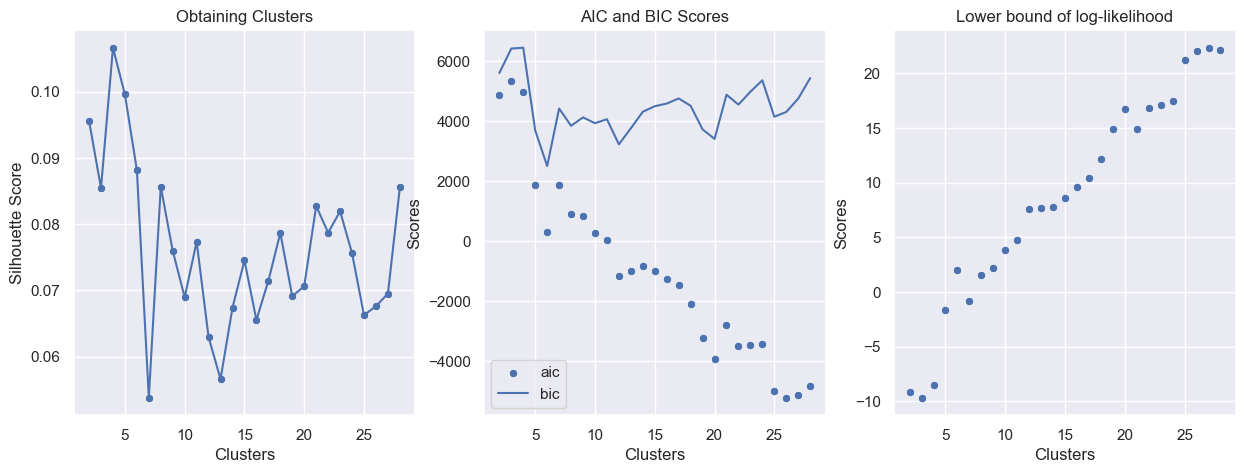

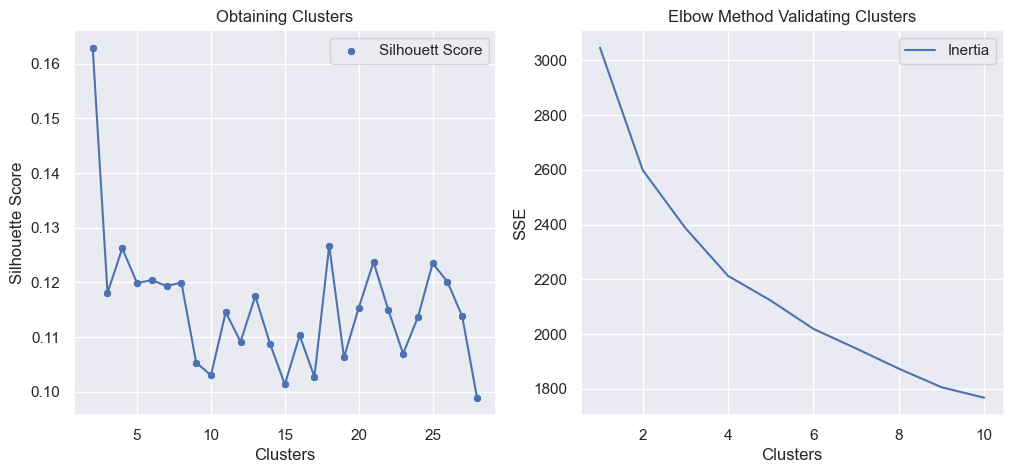

In [6]:
gmm(X_train_heart, 'hd_gmm.png')
k_means(X_train_heart, 'hd_kmeans.png')

### Step 1 cancer plots

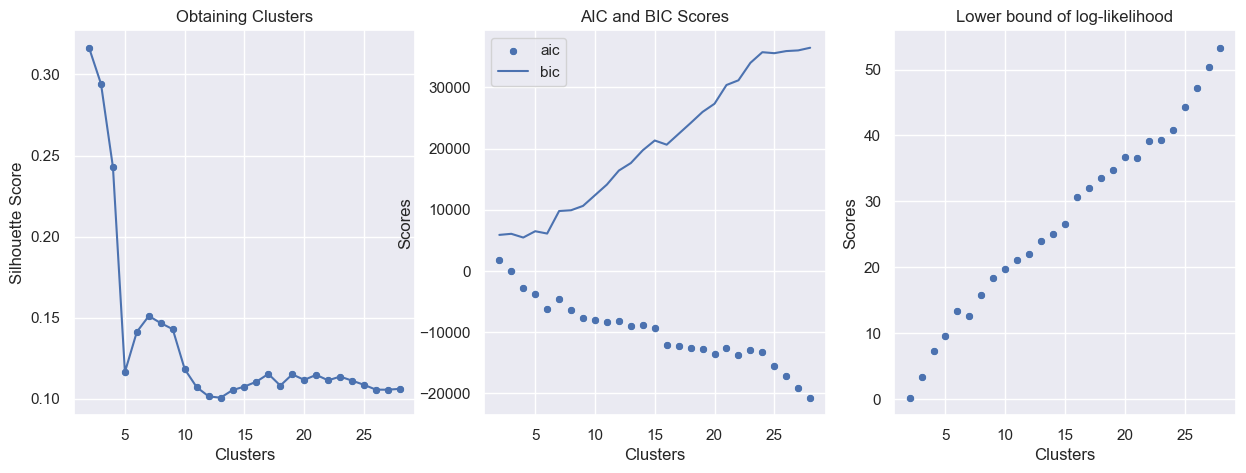

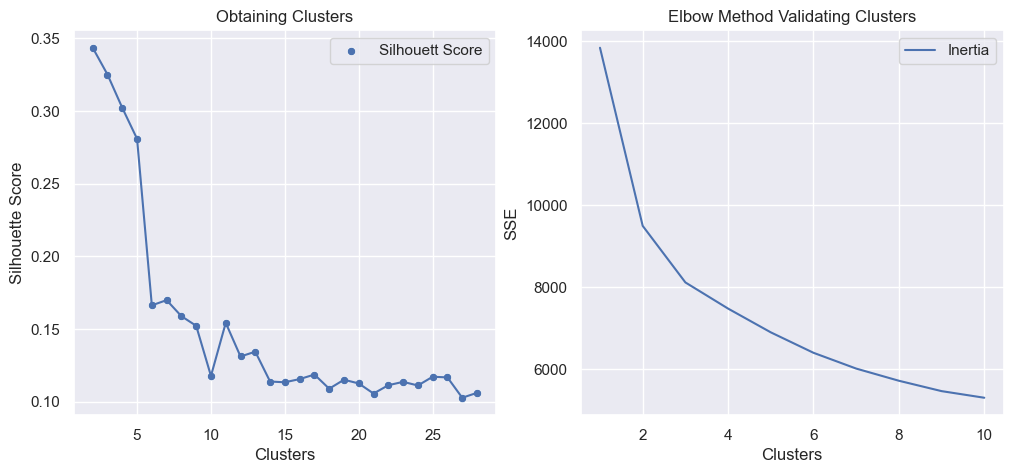

In [7]:
gmm(X_train_c, 'bc_gmm.png')
k_means(X_train_c, 'bc_kmeans.png')

### PCA Analysis


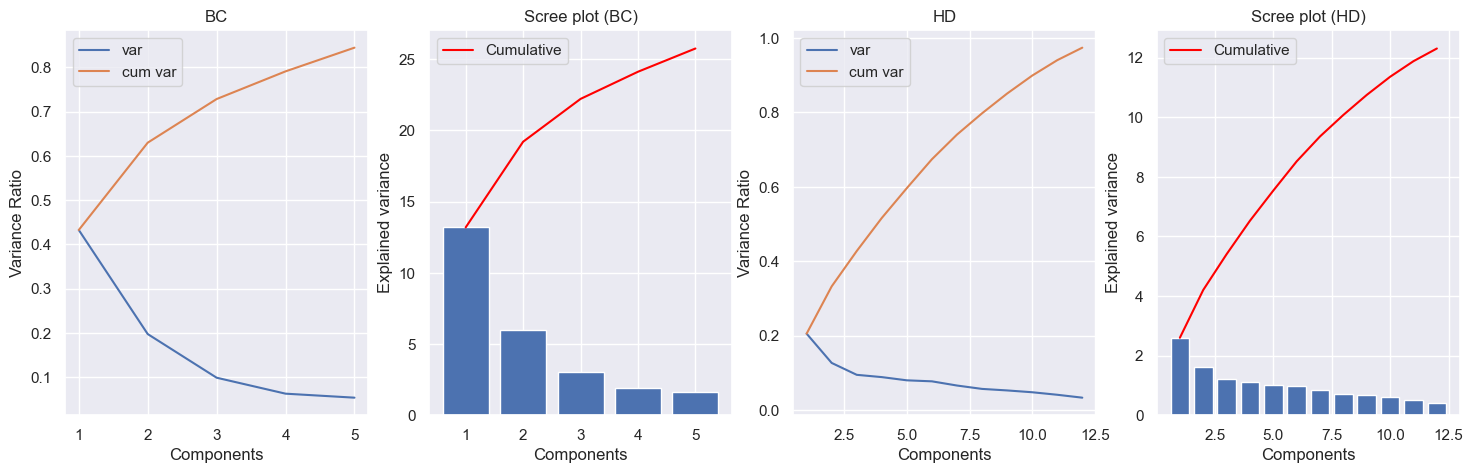

In [8]:
pca = PCA(n_components = 5)
pca.fit(X_train_c)


pca_hd = PCA(n_components = 12)
pca_hd.fit(X_train_heart)


plt.figure(figsize=(18, 5))


plt.subplot(141)

plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_, label='var')
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), np.cumsum(pca.explained_variance_ratio_), label='cum var')
plt.xlabel('Components')
plt.ylabel('Variance Ratio')
plt.title('BC')
plt.legend()


plt.subplot(142)

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative')
 
plt.legend(loc='upper left')
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.title('Scree plot (BC)')



plt.subplot(143)

plt.plot(np.arange(1, pca_hd.explained_variance_ratio_.size + 1), pca_hd.explained_variance_ratio_, label='var')
plt.plot(np.arange(1, pca_hd.explained_variance_ratio_.size + 1), np.cumsum(pca_hd.explained_variance_ratio_), label='cum var')
plt.xlabel('Components')
plt.ylabel('Variance Ratio')
plt.title('HD')
plt.legend()

plt.subplot(144)

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca_hd.explained_variance_)+1),
    pca_hd.explained_variance_
    )
 
plt.plot(
    range(1,len(pca_hd.explained_variance_ )+1),
    np.cumsum(pca_hd.explained_variance_),
    c='red',
    label='Cumulative')
 
plt.legend(loc='upper left')
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.title('Scree plot (HD)')
 
plt.savefig('PCA_analysis.png')
plt.show()



In [9]:
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

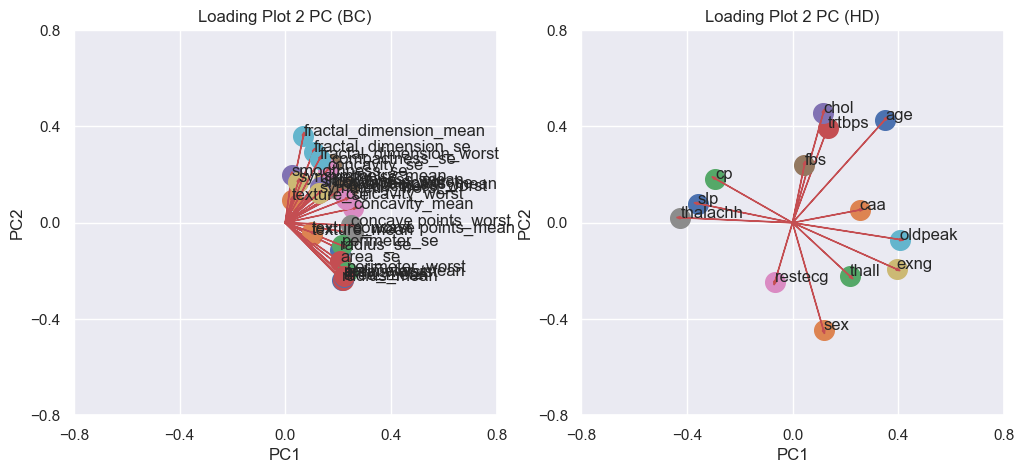

In [10]:
# Principal components correlation coefficients
loadings = pca.components_
loadings_hd = pca_hd.components_
 
# Number of features before PCA
n_features = pca.n_features_
n_features_hd = pca_hd.n_features_

 
# Feature names before PCA

canc_cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

feature_names = canc_cols
feature_names_hd = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df


#heart disease


# PC names
pc_list_hd = [f'PC{i}' for i in list(range(1, n_features_hd + 1))]
 
# Match PC names to loadings
pc_loadings_hd = dict(zip(pc_list_hd, loadings_hd))
 
# Matrix of corr coefs between feature names and PCs
loadings_df_hd = pd.DataFrame.from_dict(pc_loadings_hd)
loadings_df_hd['feature_names'] = feature_names_hd
loadings_df_hd = loadings_df_hd.set_index('feature_names')





# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]

# heart disease
xs_hd = loadings_hd[0]
ys_hd = loadings_hd[1]
 
    

plt.figure(figsize=(12, 5))


plt.subplot(121)


# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Loading Plot 2 PC (BC)')



plt.subplot(122)


# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names_hd):
    plt.scatter(xs_hd[i], ys_hd[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs_hd[i], # length of the arrow along x
        ys_hd[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs_hd[i], ys_hd[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('Loading Plot 2 PC (HD)')
plt.savefig('PCA_loading_plot.png')
plt.show()


### ICA 

In [11]:
def ica():
    
    max_c = 20

    kurtosis_values = []
    kurtosis_values_hd = []



    for i in range(1,max_c):

        X_ICA = FastICA(n_components = i).fit_transform(X_train_c)
        kur = scipy.stats.kurtosis(X_ICA)
        kurtosis_values.append(np.mean(kur)/i)

        X_ICA_hd = FastICA(n_components = i).fit_transform(X_train_heart)
        kur_hd = scipy.stats.kurtosis(X_ICA_hd)
        kurtosis_values_hd.append(np.mean(kur_hd)/i)


    kurtosis_values = np.array(kurtosis_values)
    kurtosis_values_hd = np.array(kurtosis_values_hd)

    plt.figure()
    plt.plot(np.arange(1,max_c),kurtosis_values, label= 'Cancer')
    plt.plot(np.arange(1,max_c),kurtosis_values_hd, label= 'Heart Disease')

    plt.xlabel('Components')
    plt.ylabel('Normalized Mean Kurtosis')
    plt.legend()
    plt.savefig('ICA_kurtosis.png')

    plt.show()
    
    return kurtosis_values_hd

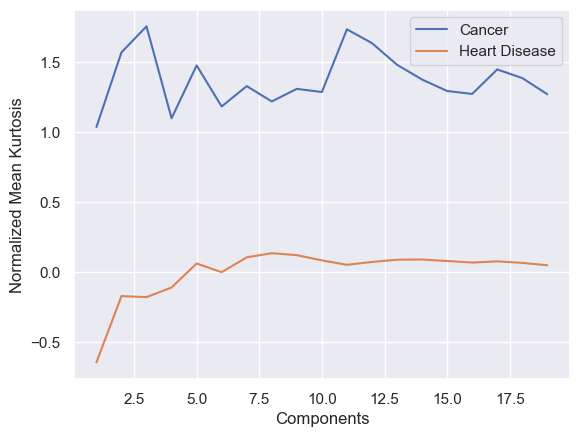

In [12]:
n = ica()

In [13]:
n

array([-0.64815684, -0.17352219, -0.18106695, -0.11169901,  0.05981586,
       -0.00258288,  0.1039087 ,  0.1335477 ,  0.11954426,  0.08210962,
        0.05049698,  0.07078991,  0.08670545,  0.08839012,  0.0776323 ,
        0.06641961,  0.0751716 ,  0.06438034,  0.04685709])

### Randomized Projections

In [14]:
def random_projections():

    recons_error = []
    recons_variance = []
    max_comp = 10
    for i in range(1,max_comp):
        mean_mse = []
        for j in range(0,100):
            rp = GaussianRandomProjection(n_components=i)
            transformed = rp.fit_transform(X_train_c)
            recons = rp.inverse_transform(transformed)
            mean_mse.append(mean_squared_error(X_train_c, recons))
        recons_variance.append(np.std(mean_mse))
        recons_error.append(np.mean(mean_mse))


    plt.figure(figsize = (12,5))
    plt.subplot(121)

    recons_error = np.array(recons_error)
    plt.plot(np.arange(1,max_comp),recons_error)
    plt.fill_between(np.arange(1,max_comp),recons_error - recons_variance, recons_error + recons_variance, alpha=0.1)
    plt.xlabel('Components')
    plt.ylabel('Reconstruction Error for RP')
    plt.title('Cancer Dataset')

    recons_error_hd = []
    recons_variance_hd = []
    max_comp = 10
    for i in range(1,max_comp):
        mean_mse_hd = []
        for j in range(0,100):
            rp = GaussianRandomProjection(n_components=i)
            transformed_hd = rp.fit_transform(X_train_heart)
            recons_hd = rp.inverse_transform(transformed_hd)
            mean_mse_hd.append(mean_squared_error(X_train_heart, recons_hd))
        recons_variance_hd.append(np.std(mean_mse_hd))
        recons_error_hd.append(np.mean(mean_mse_hd))



    plt.subplot(122)
    recons_error_hd = np.array(recons_error_hd)
    plt.plot(np.arange(1,max_comp),recons_error_hd)
    plt.fill_between(np.arange(1,max_comp),recons_error_hd - recons_variance_hd, recons_error_hd + recons_variance_hd, alpha=0.1)
    plt.xlabel('Components')
    plt.ylabel('Reconstruction Error for RP')
    plt.title('Heart Disease Dataset')

    plt.savefig('random_projection.png')
    plt.show()

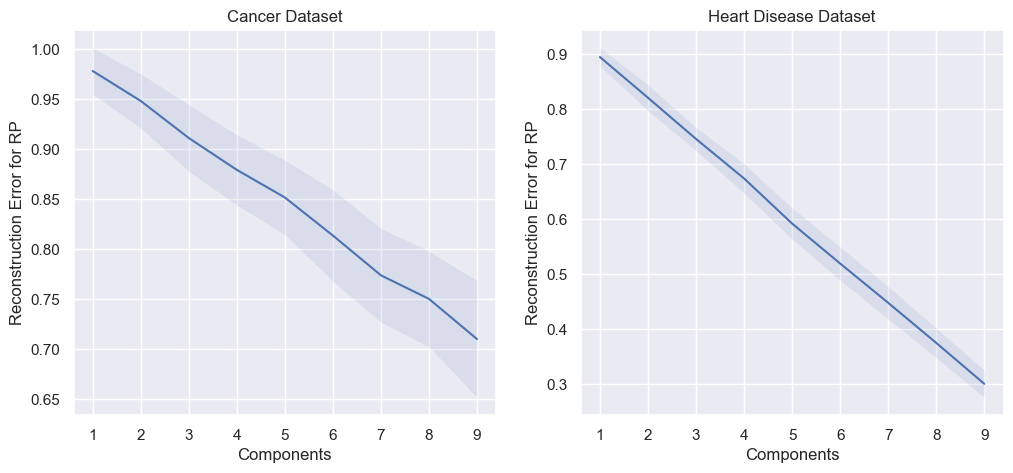

In [15]:
random_projections()

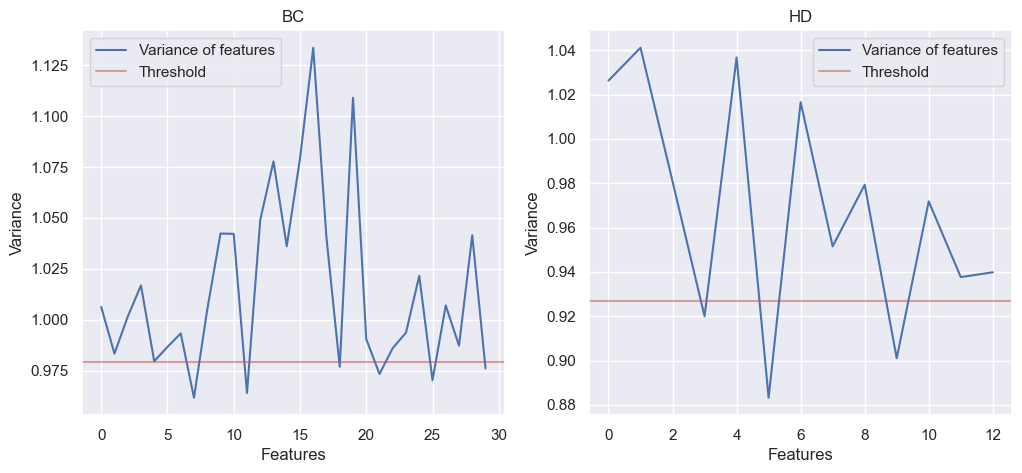

In [16]:


bc_threshold = 0.979051067311012
hd_treshold = 0.9270439466688257

sel = VarianceThreshold(threshold=bc_threshold)
trans = sel.fit_transform(X_train_c)


sel_hd = VarianceThreshold(threshold=hd_treshold)
trans = sel_hd.fit_transform(X_train_heart)

plt.figure(figsize = (12,5))
plt.subplot(121)

plt.plot(sel.variances_, label='Variance of features')
plt.axhline(y=bc_threshold, color='r', label='Threshold', alpha = 0.5)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('BC')
plt.legend()


plt.subplot(122)

plt.plot(sel_hd.variances_, label='Variance of features')
plt.axhline(y=hd_treshold, color='r', label='Threshold', alpha = 0.5)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('HD')
plt.legend()

plt.savefig('threshold_variance.png')

plt.show()


### PCA K Means

In [17]:
def transform_pca():
    hd_comp = 7
    bc_comp = 3
    
    pca_bc = PCA(n_components = bc_comp)
    pca_hd = PCA(n_components = hd_comp)
    
    X_train_c_pca = pca_bc.fit_transform(X_train_c)
    X_train_heart_pca = pca_hd.fit_transform(X_train_heart)

    return X_train_c_pca, X_train_heart_pca

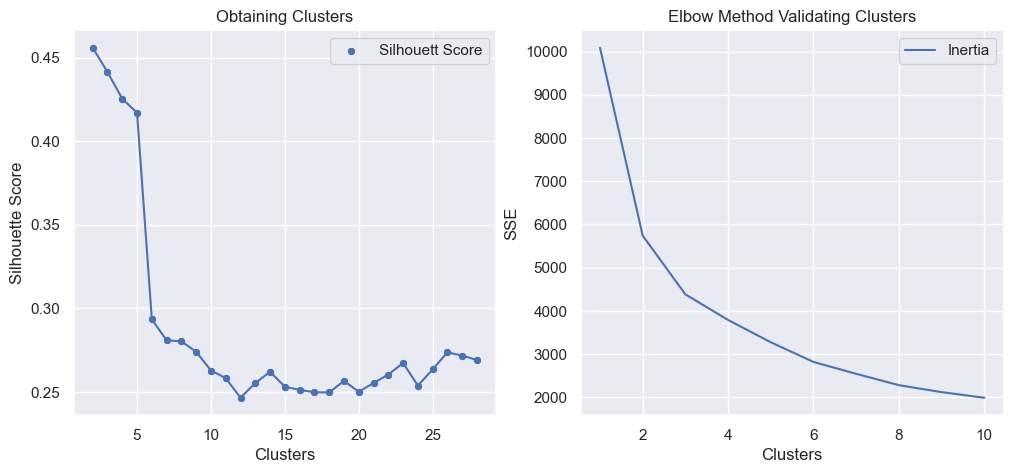

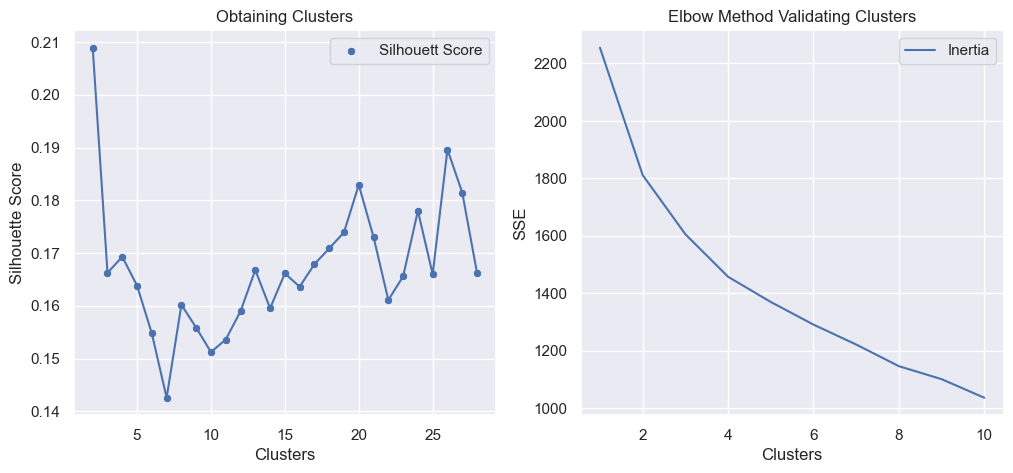

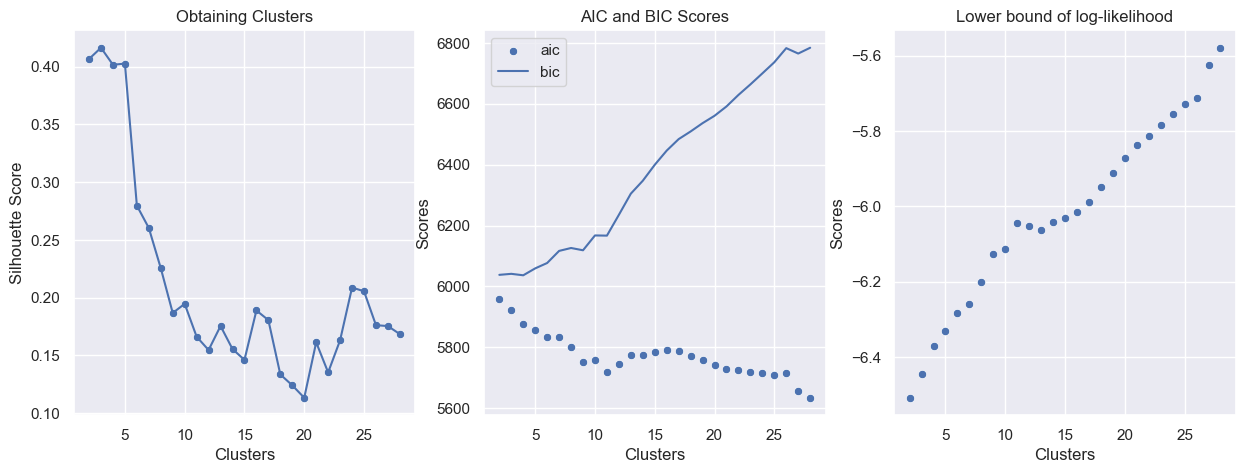

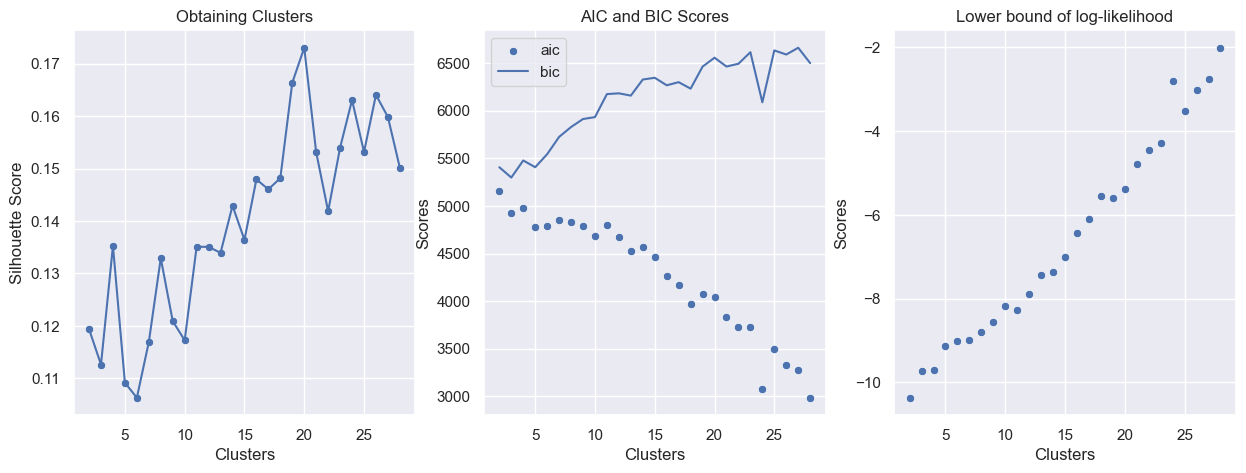

In [18]:
c_pca, heart_pca = transform_pca()
k_means(c_pca, 'bc_kmeans_pca.png')
k_means(heart_pca, 'hd_kmeans_pca.png')

gmm(c_pca, 'bc_gmm_pca.png')
gmm(heart_pca, 'hd_gmm_pca.png')





### ICA K Means

In [19]:
def transform_ica():
    from sklearn.decomposition import FastICA, TruncatedSVD

    bc_comp = 3
    hd_comp = 10
    
    
    ica_bc = FastICA(n_components = bc_comp)
    ica_hd = FastICA(n_components = hd_comp)
    
    X_train_c_ica = ica_bc.fit_transform(X_train_c)
    X_train_heart_ica = ica_hd.fit_transform(X_train_heart)

    return X_train_c_ica, X_train_heart_ica

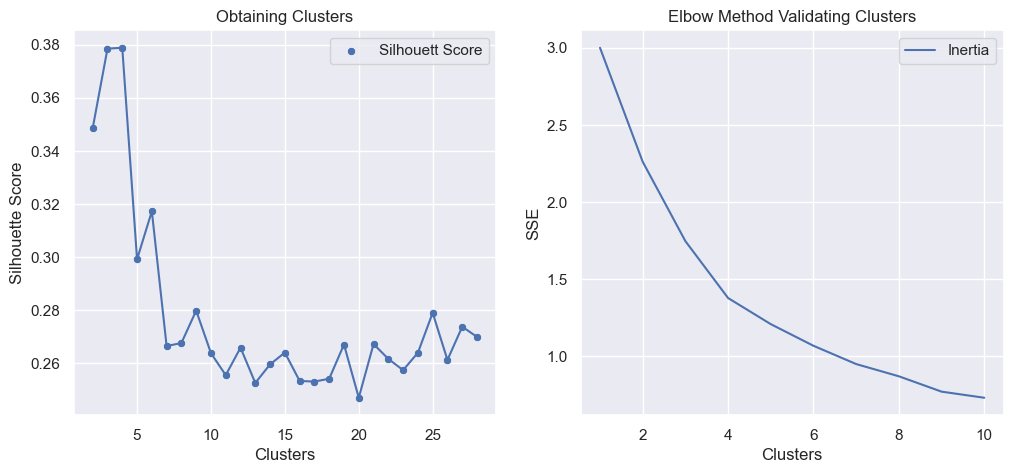

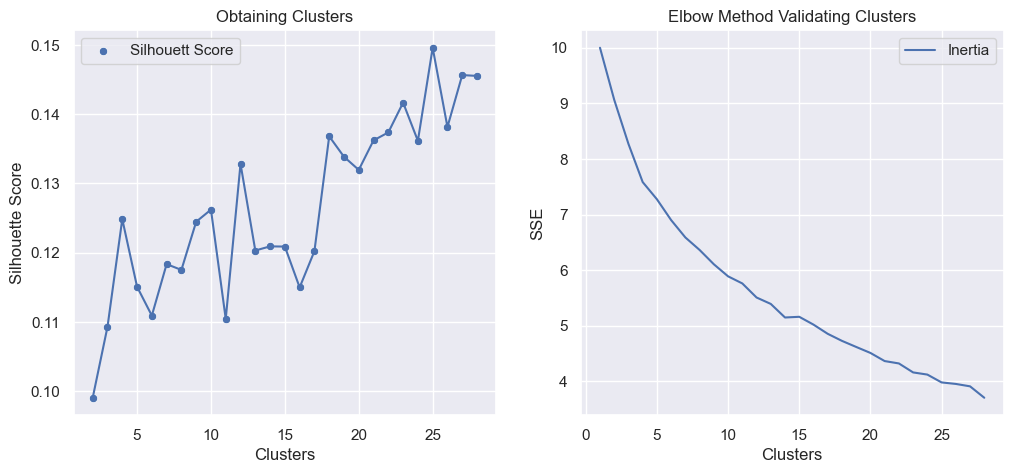

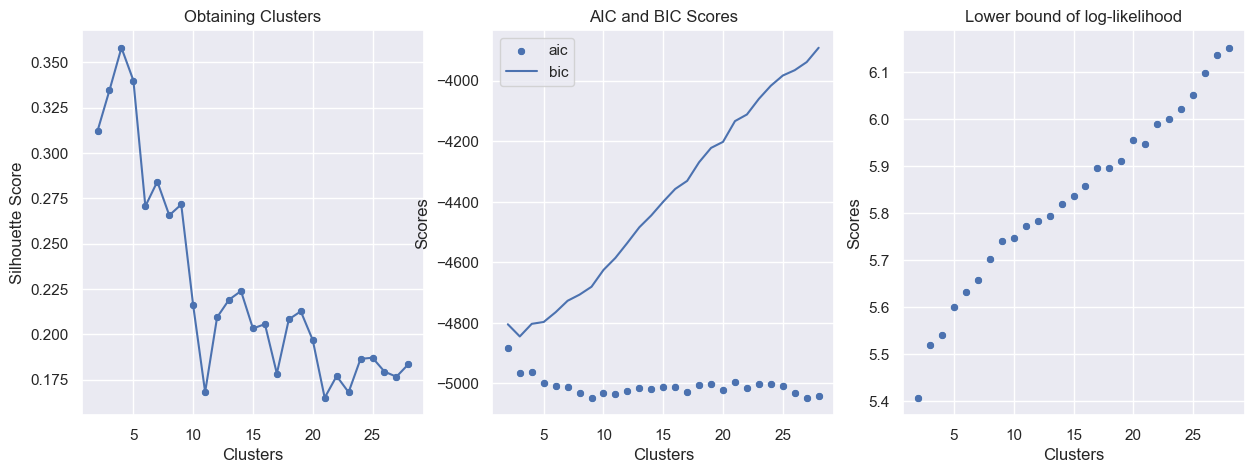

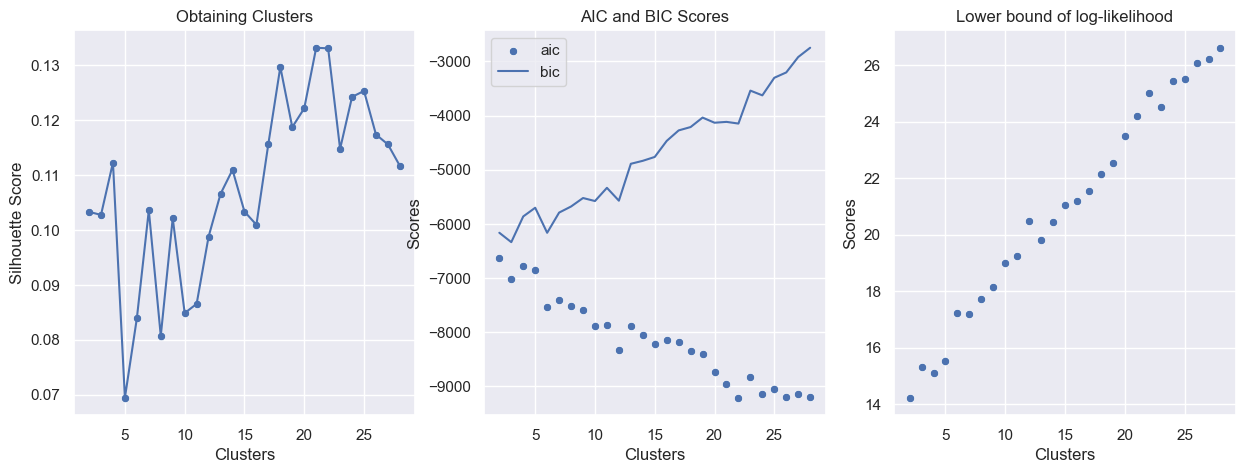

In [20]:
c_ica, heart_ica = transform_ica()
k_means(c_ica, 'bc_kmeans_ica.png')
k_means(heart_ica, 'hd_kmeans_ica.png', slicing = 28)


gmm(c_ica, 'bc_gmm_ica.png')
gmm(heart_ica, 'hd_gmm_ica.png')


### RP K Means


In [21]:
def transform_rp():
    bc_comp = 6
    hd_comp = 7
    
    recons_hd = []
    mean_mse_hd = []
    
    rp = GaussianRandomProjection(n_components=bc_comp)
    transformed = rp.fit_transform(X_train_c)


    rp_hd = GaussianRandomProjection(n_components=hd_comp)
    transformed_hd = rp.fit_transform(X_train_heart)
    
    return transformed, transformed_hd
    

In [22]:
c_rp, heart_rp = transform_rp()

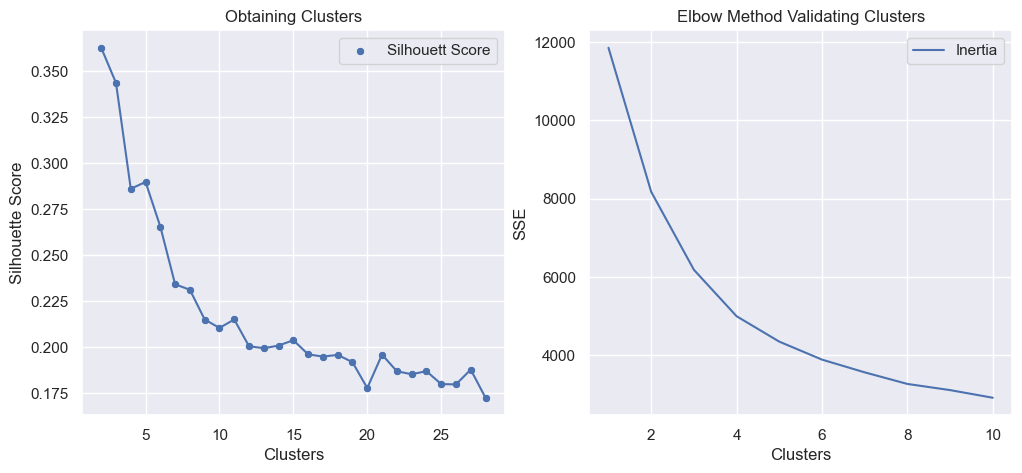

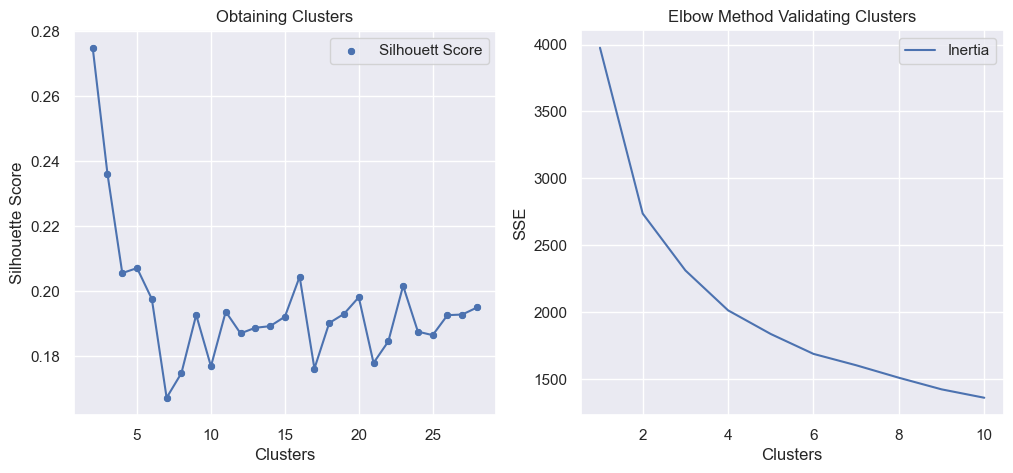

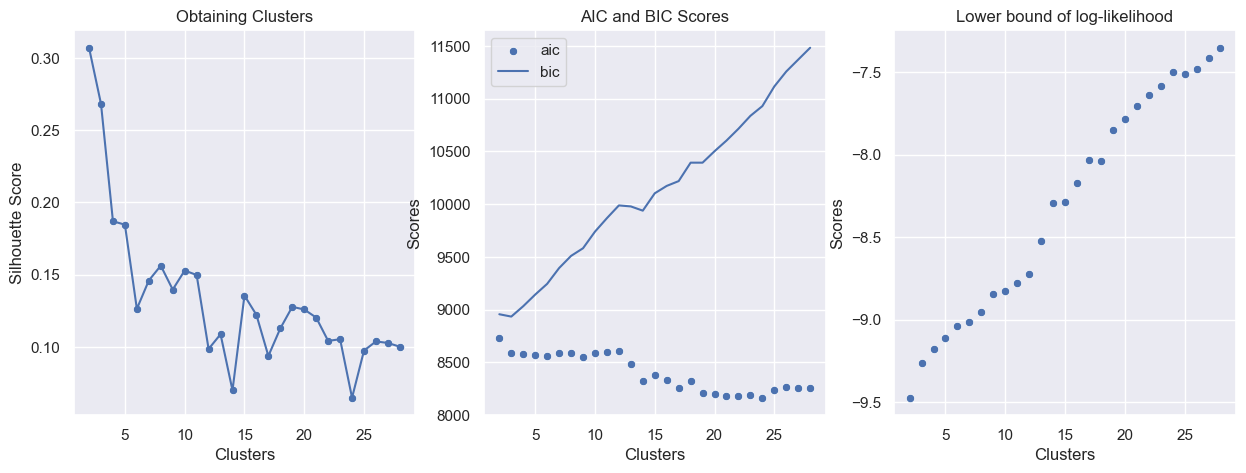

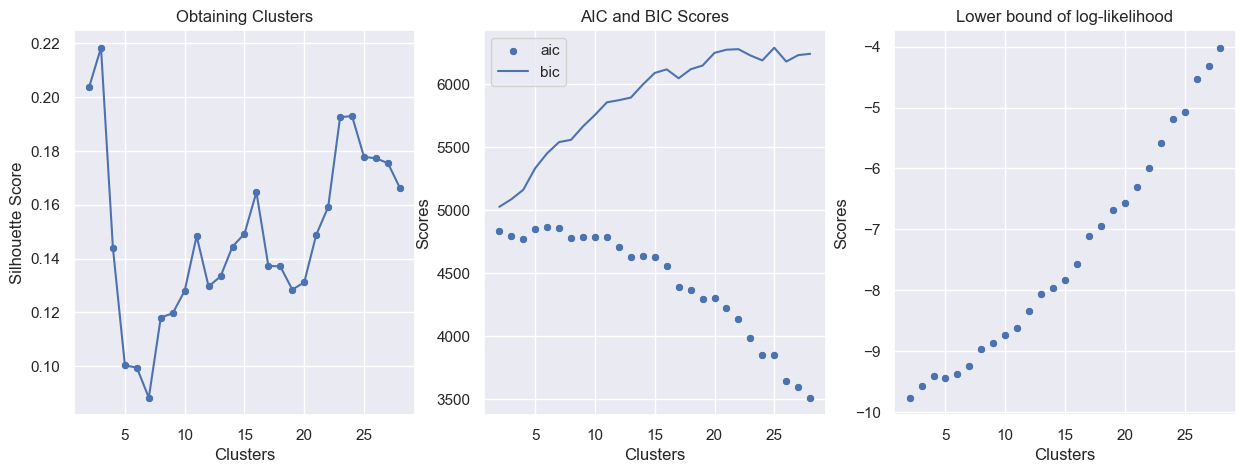

In [23]:
k_means(c_rp, 'bc_kmeans_rp.png')
k_means(heart_rp, 'hd_kmeans_rp.png')



gmm(c_rp, 'bc_gmm_rp.png')
gmm(heart_rp, 'hd_gmm_rp.png')

### High Variance Feature Selection

In [24]:
def transform_low_var():
    
    bc_threshold = 0.979051067311012
    hd_treshold = 0.9270439466688257

    sel = VarianceThreshold(threshold=bc_threshold)
    trans = sel.fit_transform(X_train_c)


    sel_hd = VarianceThreshold(threshold=hd_treshold)
    trans_hd = sel_hd.fit_transform(X_train_heart)
    
    
    return trans, trans_hd

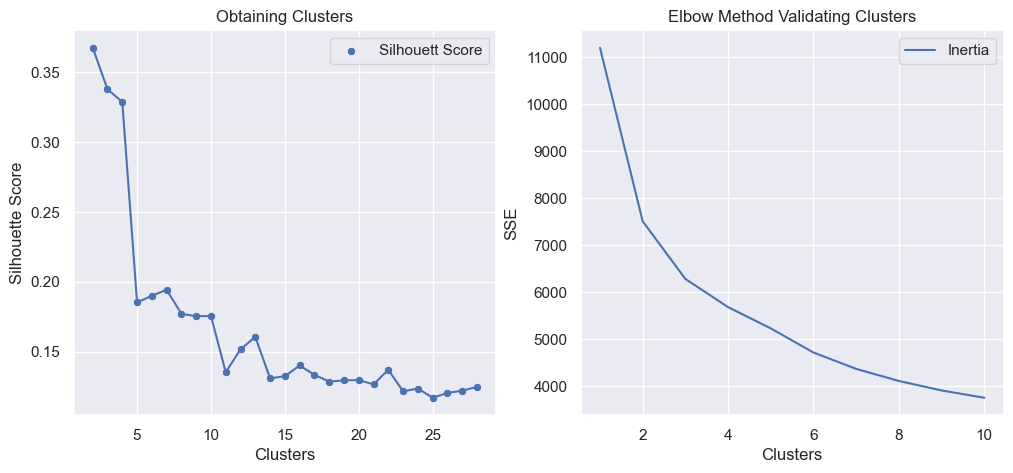

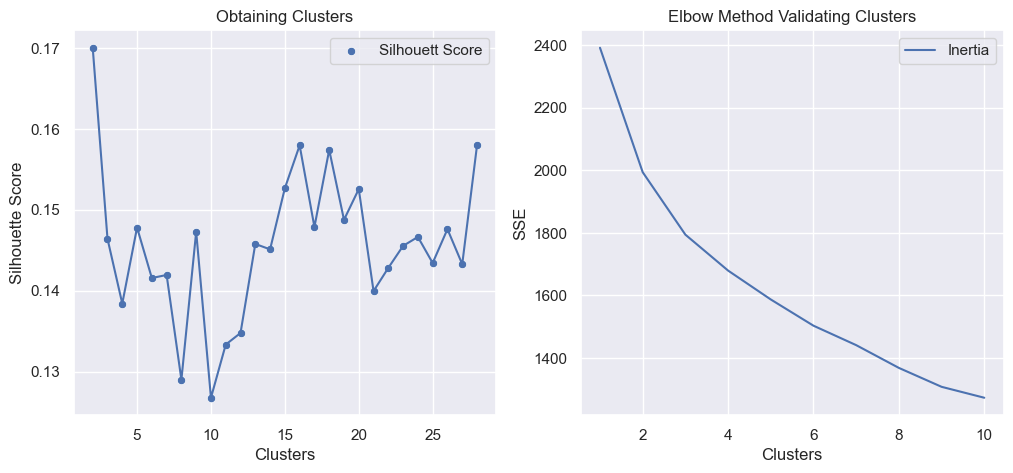

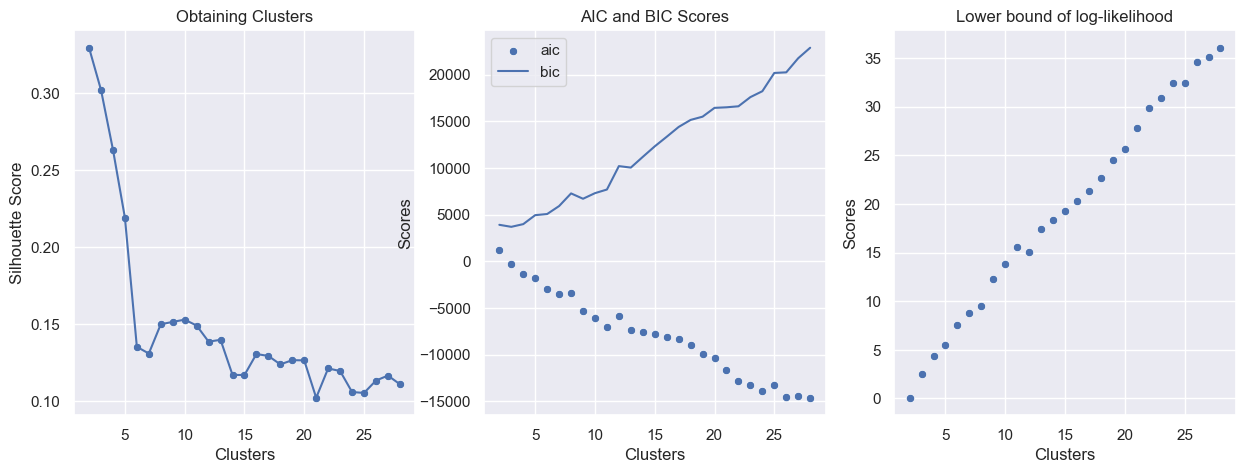

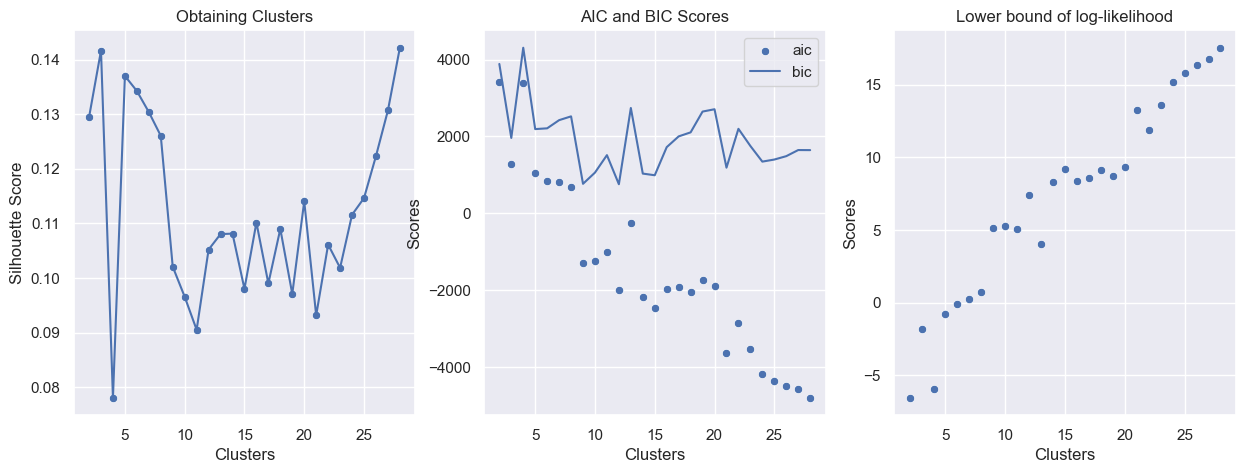

In [25]:
c_lv, heart_lv = transform_low_var()

k_means(c_lv, 'bc_kmeans_lv.png')
k_means(heart_lv, 'hd_kmeans_lv.png')



gmm(c_lv, 'bc_gmm_lv.png')
gmm(heart_lv, 'hd_gmm_lv.png')

### Validating Plot

In [26]:
def plot_3d(transformed_data, y_values, title):

    ax = plt.axes(projection='3d')

    zline = transformed_data[:,2]
    xline = transformed_data[:,0]
    yline = transformed_data[:,1]
    ax.scatter(xline, yline, zline, c=y_values, cmap='Accent', linewidth=0.5);
    plt.savefig(title)
    plt.show()

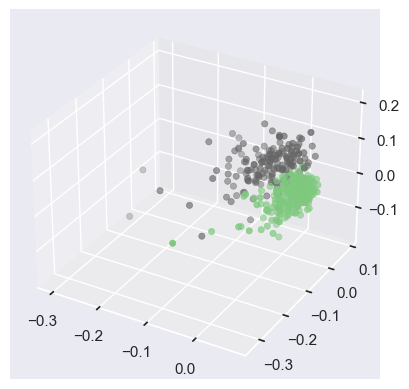

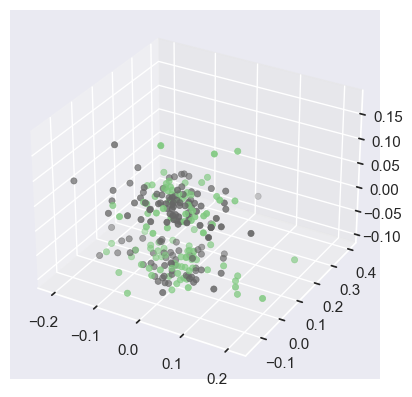

In [27]:
plot_3d(c_ica, y_train_c, 'ica_3d_plot.png')
plot_3d(heart_ica, y_train_heart, 'ica_3d_plot_hd.png')

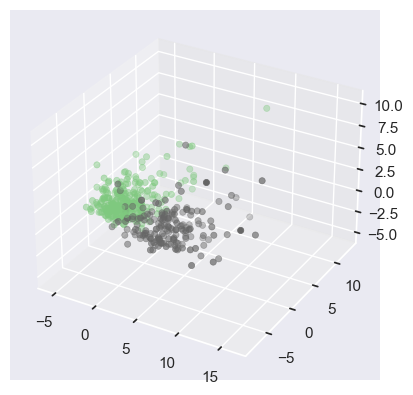

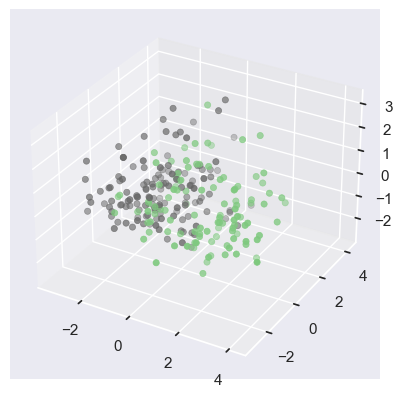

In [28]:
plot_3d(c_pca, y_train_c, 'pca_3d_plot.png')
plot_3d(heart_pca, y_train_heart, 'pca_3d_plot_hd.png')

### Training NN On Dimensionally Reduced Data

In [29]:
def nn_activ_comp_c(X_scaled, X_val_scaled, title):
    
    activation_funcs = ['identity', 'logistic', 'tanh', 'relu']
    solvers = ['lbfgs', 'sgd', 'adam']
    
    train_acc = [[], [], [], []]
    val_acc = [[], [], [], []]

    for i, activation in enumerate(activation_funcs):
        for solver in solvers:
            params = {
            "activation": activation,
            "solver": solver,
            "max_iter": 100,
            "random_state": 42
            }
            # if transformed:
            train, val = get_scores_nn_c(params, X_scaled, X_val_scaled)
            # else:
            #     train, val = get_scores_nn_c(params)
            train_acc[i].append(train)
            val_acc[i].append(val)

    plot_nn_comp(train_acc, val_acc, solvers, title)

In [30]:
def plot_nn_comp(train, test, x, title=None):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,6))
    
    #plot linear
    sns.scatterplot(ax=ax1, x=x, y=train[0])
    sns.scatterplot(ax=ax1, x=x, y=test[0])
    
    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('Solver')
    ax1.set_title('Identity')
    ax1.legend(labels=['Training', 'Validation'])
    
    
    #plot poly
    sns.scatterplot(ax=ax2, x=x, y=train[1])
    sns.scatterplot(ax=ax2, x=x, y=test[1])
    
    # ax2.set_ylabel('Accuracy Score')
    ax2.set_xlabel('Solver')
    ax2.set_title('Logistic')
    ax2.legend(labels=['Training', 'Validation'])
    
    
    
    #plot rbf
    sns.scatterplot(ax=ax3, x=x, y=train[2])
    sns.scatterplot(ax=ax3, x=x, y=test[2])
    
    # ax3.set_ylabel('Accuracy Score')
    ax3.set_xlabel('Solver')
    ax3.set_title('Tanh')
    ax3.legend(labels=['Training', 'Validation'])
    
    #plot sigmoid
    sns.scatterplot(ax=ax4, x=x, y=train[3])
    sns.scatterplot(ax=ax4, x=x, y=test[3])
    
    # ax4.set_ylabel('Accuracy Score')
    ax4.set_xlabel('Solver')
    ax4.set_title('Relu')
    ax4.legend(labels=['Training', 'Validation'])
    
    fig.suptitle('Comparison of different Activation Functions')
    
    if title:
        plt.savefig(title)

In [31]:
def get_scores_nn_c(args, scaled_x_train = None, scaled_x_val = None):
    
#     x_trains = X_train_main_c
#     x_vals = X_validation_c
    
    # if transformed:
    x_trains = scaled_x_train
    x_vals = scaled_x_val
        
    
    neur_net = MLPClassifier(**args)
    neur_net.fit(x_trains, y_train_main_c)
    y_pred_train_neu = neur_net.predict(x_trains)
    acc_training_neu = accuracy_score(y_train_main_c, y_pred_train_neu)
    
    

    y_pred_val_neu = neur_net.predict(x_vals)
    acc_validation_neu = accuracy_score(y_validation_c, y_pred_val_neu)
    acc_validation_neu
    
    return acc_training_neu, acc_validation_neu  

In [32]:

cancer_data = pd.read_csv('cancer_data.csv')

cancer_data.drop('id',axis=1,inplace=True)
cancer_data.drop('Unnamed: 32',axis=1,inplace=True)

cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1,'B':0})

X_canc = cancer_data.drop(['diagnosis'], axis=1)
y_canc = cancer_data['diagnosis']

X2 = preprocessing.scale(X_canc)


# X_canc = preprocessing.scale(X_canc)

# X_canc = preprocessing.StandardScaler().fit_transform(X_canc)


X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_canc, y_canc, test_size=0.20, random_state=42)
X_train_main_c, X_validation_c, y_train_main_c, y_validation_c = \
train_test_split(X_train_c, y_train_c, test_size = 0.25, random_state = 42)

X_train_c_scaled, X_test_c_scaled, y_train_c_scaled, y_test_c_scaled = train_test_split(X2, y_canc, test_size=0.20, random_state=42)
X_train_main_c_scaled, X_validation_c_scaled, y_train_main_c_scaled, y_validation_c_scaled = \
train_test_split(X_train_c_scaled, y_train_c, test_size = 0.25, random_state = 42)

def transform_pca_bc():
    bc_comp = 3
    
    pca_bc = PCA(n_components = bc_comp)
    
    X_train_c_pca = pca_bc.fit_transform(X_train_main_c_scaled)
    X_val_c_pca = pca_bc.fit_transform(X_validation_c_scaled)


    return X_train_c_pca, X_val_c_pca

def transform_ica_bc():

    bc_comp = 3
    
    
    ica_bc = FastICA(n_components = bc_comp)
    
    X_train_c_ica = ica_bc.fit_transform(X_train_main_c_scaled)
    X_val_c_ica = ica_bc.fit_transform(X_validation_c_scaled)


    return X_train_c_ica, X_val_c_ica

def transform_rp_bc():
    bc_comp = 6

    
    rp = GaussianRandomProjection(n_components=bc_comp)
    transformed = rp.fit_transform(X_train_main_c_scaled)
    transformed_val = rp.fit_transform(X_validation_c_scaled)


    
    return transformed, transformed_val
    
    
def transform_low_var_bc():
    
    bc_threshold = 0.979051067311012

    sel = VarianceThreshold(threshold=bc_threshold)
    trans = sel.fit_transform(X_train_main_c_scaled)
    trans_val = sel.fit_transform(X_validation_c_scaled)



    return trans, trans_val

In [33]:
c_pca, c_pca_val = transform_pca_bc()
c_ica, c_ica_val = transform_ica_bc()
c_rp, c_rp_val = transform_rp_bc()
c_lv, c_lv_val = transform_low_var_bc()


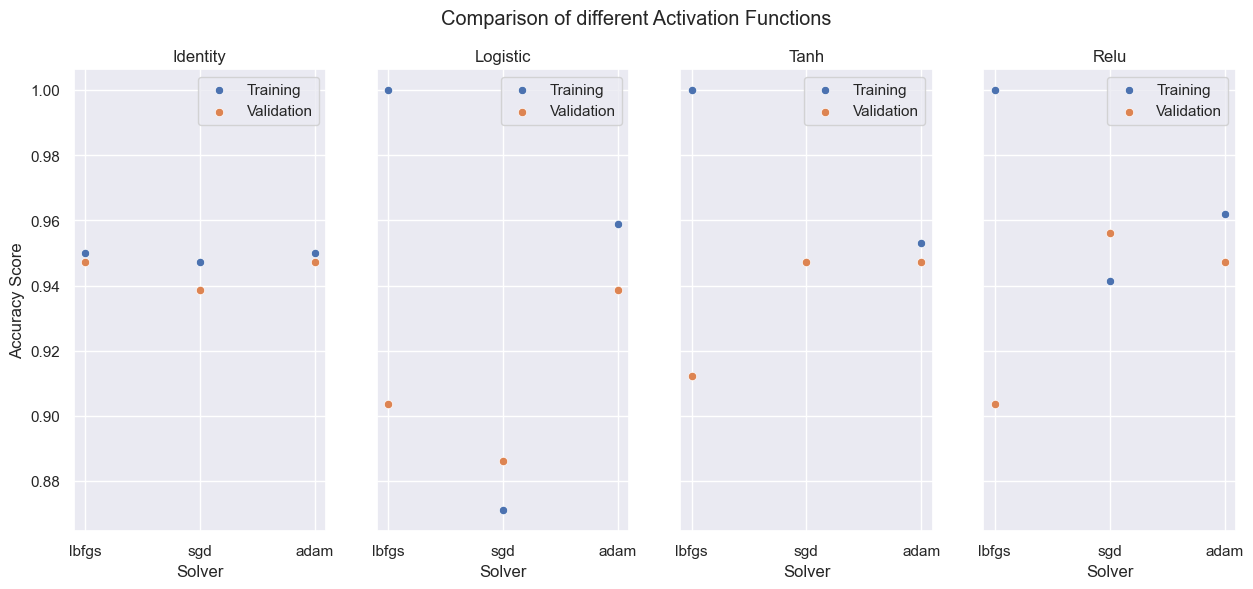

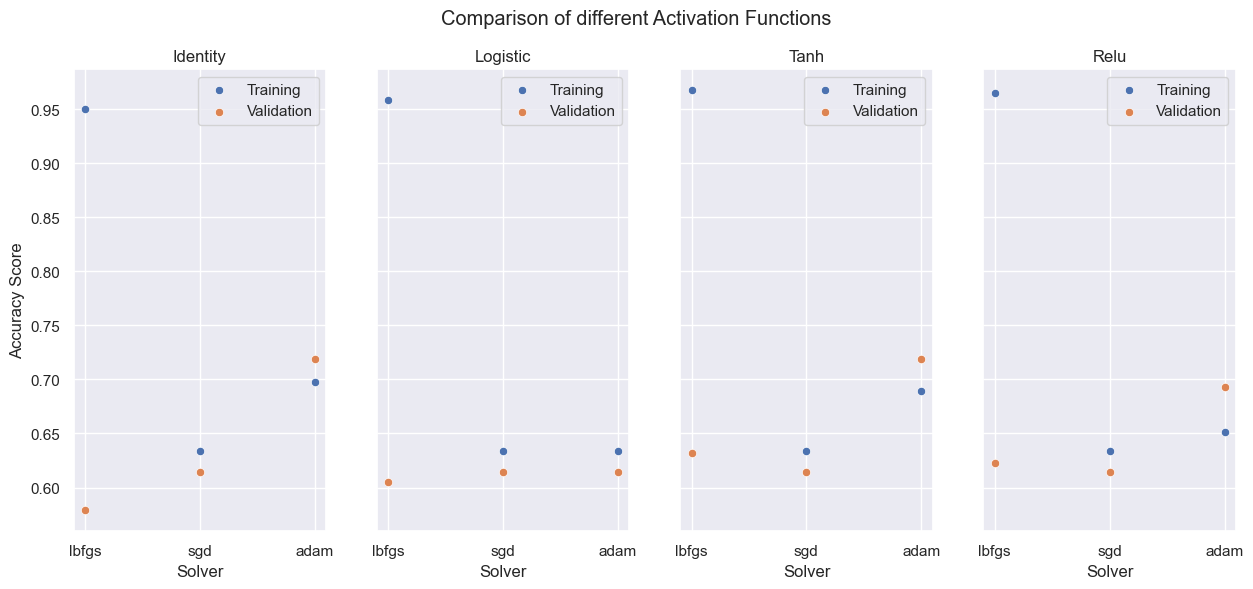

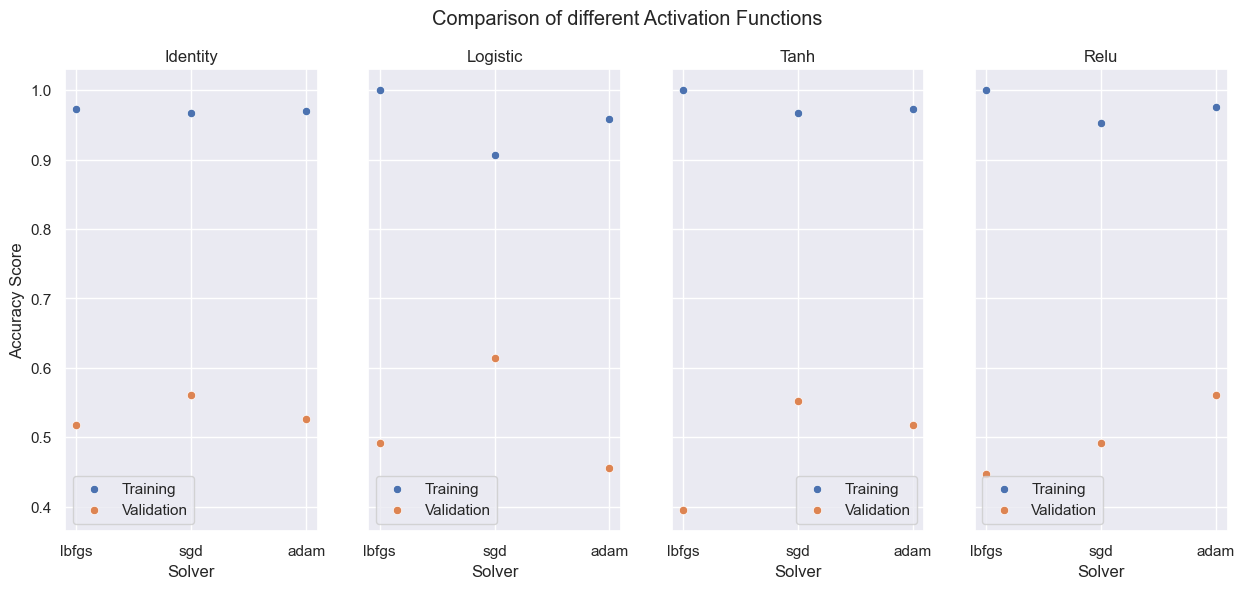

In [34]:
nn_activ_comp_c(c_pca, c_pca_val, 'pca_scaled_bc')
nn_activ_comp_c(c_ica, c_ica_val, 'ica_scaled_bc')
nn_activ_comp_c(c_rp, c_rp_val, 'rp_scaled_bc')

### Wall Clock Time Comparison

In [35]:
params = {
        "activation": 'identity',
        "solver": 'lbfgs',
        "hidden_layer_sizes": (1,),
        "random_state": 42,
        }




In [36]:
%%timeit
get_scores_nn_c(params, c_pca, c_pca_val)

1.31 ms ± 4.61 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [37]:
%%timeit
get_scores_nn_c(params, c_ica, c_ica_val)

5.64 ms ± 15.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
%%timeit
get_scores_nn_c(params, c_rp, c_rp_val)

1.85 ms ± 5.63 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [39]:
import pandas as pd

data = {'PCA': [3, 1.07,0.00599,1.32,0.00672], 'ICA': [3, 1.66,0.00726,6.15,0.00545], 'RP': [6, 1.36,0.00594,1.96,0.00295], 'HV': [13, 10.2,5.3,12.54,6.1], 'Original': [30, 24.7,2.2,27.3,2.81]}
df_time = pd.DataFrame.from_dict(data, orient='index',
                           columns=['Features', \
                                    'Train Time', 'Train Error', 'Total Time', 'Total Error'])



In [40]:
import dataframe_image as dfi
dfi.export(df_time, "wall_clock_time.png", table_conversion='matplotlib')


### Clustering and NN

In [41]:
def pre_process_clustering(k_means = True):
    if k_means:
        trans, trans_val = transform_k_means()
    else: 
        trans, trans_val = transform_gmm()
        trans = trans.reshape((trans.shape[0], 1))
        trans_val = trans_val.reshape((trans_val.shape[0], 1))

        
    all_data = np.hstack((X_train_main_c_scaled, trans))
    all_data_val = np.hstack((X_validation_c_scaled, trans_val))
    return all_data, all_data_val

In [42]:
def transform_k_means():
    k_means_clustering = KMeans(n_clusters=2, random_state=42)
    transformed = k_means_clustering.fit_transform(X_train_main_c_scaled)
    transformed_val = k_means_clustering.fit_transform(X_validation_c_scaled)    
    
    return transformed, transformed_val

In [43]:
def transform_gmm():
    gm = GaussianMixture(n_components=2, random_state=42, )
    gm.fit(X_train_main_c_scaled)
    transformed = gm.predict(X_train_main_c_scaled)
    transformed_val = gm.predict(X_validation_c_scaled)    
    
    return transformed, transformed_val

    

In [44]:
def nn_clustering():
    train_data, val_data = pre_process_clustering()
    nn_activ_comp_c(train_data, val_data, 'kmeans_scaled_bc.png')
    
    train_data, val_data = pre_process_clustering(False)
    nn_activ_comp_c(train_data, val_data, 'gmm_scaled_bc.png')

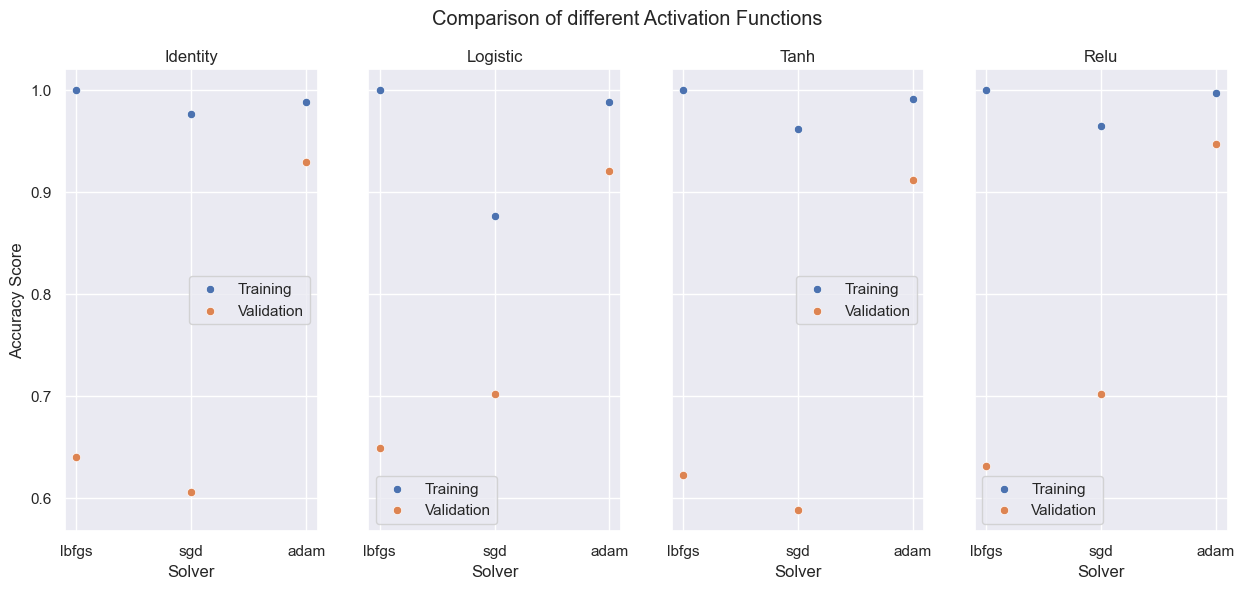

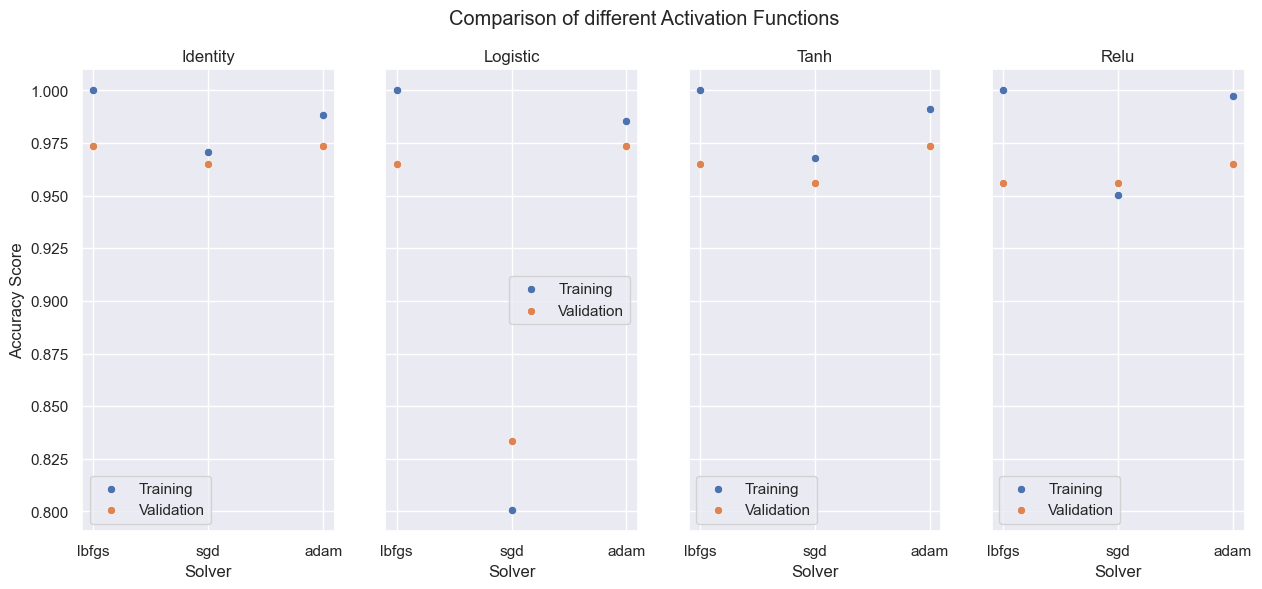

In [45]:
nn_clustering()

In [46]:
%%timeit

params = {
        "activation": 'relu',
        "solver": 'adam',
        "hidden_layer_sizes": (1,),
        "random_state": 42,
        }
train_data, val_data = pre_process_clustering()
get_scores_nn_c(params, train_data, val_data)

155 ms ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
params = {
        "activation": 'relu',
        "solver": 'adam',
        "hidden_layer_sizes": (1,),
        "random_state": 42,
        }
train_data, val_data = pre_process_clustering()
get_scores_nn_c(params, train_data, val_data)

(0.36656891495601174, 0.38596491228070173)

In [48]:
%%timeit

params = {
        "activation": 'identity',
        "solver": 'lbfgs',
        "hidden_layer_sizes": (1,),
        "random_state": 42,
        }

train_data, val_data = pre_process_clustering(False)
get_scores_nn_c(params, train_data, val_data)

15.1 ms ± 217 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:

data = {'K Means': [32, 139, 21.2,162,4.73], 'GMM': [31, 16.2,1.93,18.3,2.19], 'Original': [30, 24.7,2.2,27.3,2.81]}
df_time = pd.DataFrame.from_dict(data, orient='index',
                           columns=['Features', \
                                    'Train Time', 'Train Error', 'Total Time', 'Total Error'])



In [50]:
dfi.export(df_time, "wall_clock_time_cluster.png", table_conversion='matplotlib')
